In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import plot_partial_dependence

In [12]:
#laster inn data 
data = pd.read_csv("..//Data/compas-scores-two-years.csv")
data = data[data["days_b_screening_arrest"] <= 30]
data = data[data["days_b_screening_arrest"] >= -30]

In [3]:
# velger hensiktsmessig data (kopierer fra oppgavetekst)
X = data[["age_cat", "race", "sex", "priors_count", "c_charge_degree", "two_year_recid"]]
categorical_cols = ["age_cat", "race", "sex", "c_charge_degree"]
X = pd.get_dummies(X, columns=categorical_cols, prefix=categorical_cols, prefix_sep='_')
X = X.drop(["age_cat_25 - 45", "race_Caucasian", "sex_Male", "c_charge_degree_F"], axis=1)
Y = data["score_text"] != "Low"
# splitter dataen i fire med den flotte train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [4]:
# trener og tester superkjapt med sklearn sine innebygde funksjoner
model = LogisticRegression(random_state=0, max_iter=10000)
model.fit(X_train, Y_train)
Y_mdl = model.predict(X_test)
print(accuracy_score(Y_mdl, Y_test))

0.7441295546558705


In [5]:
#hvilke kolonner har vi med å gjøre?
display(X)

,priors_count,two_year_recid,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Hispanic,race_Native American,race_Other,sex_Female,c_charge_degree_M
0,0,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,0
2,4,1,0,1,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,1
6,14,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7209,0,0,0,1,1,0,0,0,0,0,0
7210,0,0,0,1,1,0,0,0,0,0,0
7211,0,0,1,0,0,0,0,0,1,0,0
7212,3,0,0,0,1,0,0,0,0,1,1


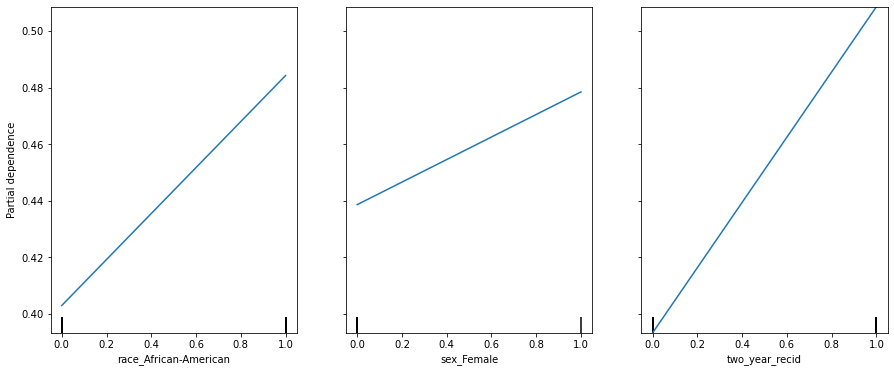

In [6]:
#plotter partial dependance
#her bør det undersøkes mye mer
features = ["race_African-American","sex_Female","two_year_recid"]
plot_partial_dependence(model, X_train, features)
plt.gcf().set_size_inches(15, 6)

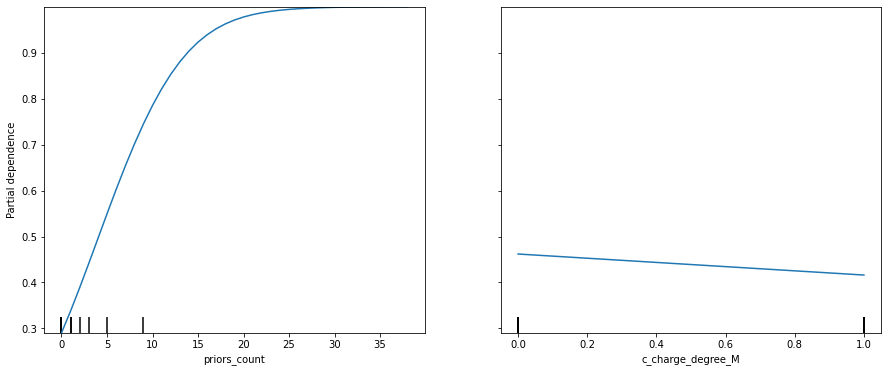

In [7]:
features = ["priors_count", "c_charge_degree_M"]
plot_partial_dependence(model, X_train, features)
plt.gcf().set_size_inches(15, 6)

## Vekten mht etnisitet??

In [8]:
def sigmoid(z):    
    return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))

In [9]:
# her står det at man bør få 1.45. 
control = sigmoid(model.intercept_)
coefs = model.coef_[0]
racialBias = np.exp( coefs[4]) / (1 - control + (control * np.exp(coefs[4])))
print(np.mean(racialBias))

1.4571093789309733


In [10]:
print(coefs)

[ 0.27465931  0.66266802 -1.36118078  1.36247088  0.47769941 -0.21318756
 -0.40252091  0.81158662 -0.78155209  0.24050815 -0.27415822]


In [11]:
print(model.intercept_)

[-1.55757653]
